In [2]:
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt
import os, sys

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

from xgboost import XGBClassifier

DATA_PATH_2023 = "../../data/matches-processed/cs2/tabular/2023/"
DATA_PATH_2024 = "../../data/matches-processed/cs2/tabular/2024/"

In [3]:
file_list_2023 = [f for f in os.listdir(DATA_PATH_2023) if f.endswith("dem_df.csv")]
file_list_2024 = [f for f in os.listdir(DATA_PATH_2024) if f.endswith("dem_df.csv")][:48]
df = None

for file in file_list_2023:
    if df is None:
        df = pd.read_csv(DATA_PATH_2023 + file)
    else:
        df = pd.concat([df, pd.read_csv(DATA_PATH_2023 + file)])
    print(f"Loaded {file}")

for file in file_list_2024:
    if df is None:
        df = pd.read_csv(DATA_PATH_2024 + file)
    else:
        df = pd.concat([df, pd.read_csv(DATA_PATH_2024 + file)])
    print(f"Loaded {file}")

Loaded 100000_blast-premier-fall-final-2023-cloud9-vs-heroic-bo3-FZhx5bice3pWss26wFHIIYcloud9-vs-heroic-m2-inferno.dem_df.csv
Loaded 100001_blast-premier-fall-final-2023-cloud9-vs-natus-vincere-bo3-vxKYiMWUPLiYn9oyBq6Njdcloud9-vs-natus-vincere-m3-inferno.dem_df.csv
Loaded 100002_blast-premier-fall-final-2023-vitality-vs-cloud9-bo3-zUIRb7v6M6zsMG7pZgHbMivitality-vs-cloud9-m3-inferno.dem_df.csv
Loaded 100003_blast-premier-fall-final-2023-vitality-vs-complexity-bo3-G-ZaUjuZ52TPMUhj947hGqvitality-vs-complexity-m3-inferno.dem_df.csv
Loaded 100004_blast-premier-fall-final-2023-vitality-vs-heroic-bo3-9zNsp9vKgCG5KpvZtTZn8yvitality-vs-heroic-m2-inferno.dem_df.csv
Loaded 100005_blast-premier-world-final-2023-cloud9-vs-vitality-bo3-GcqYdsbe4wbDz8TrHeGg0Tcloud9-vs-vitality-m2-inferno.dem_df.csv
Loaded 100006_blast-premier-world-final-2023-faze-vs-g2-bo3-q1sdE-eIVJR3iWA1ZMZkolfaze-vs-g2-m1-inferno.dem_df.csv
Loaded 100007_blast-premier-world-final-2023-faze-vs-vitality-bo3-ClpxEnxu3aH1RMZr76QdPjfa

C:\Users\szmid\AppData\Local\Temp\ipykernel_28564\2118775293.py:9: DtypeWarning: Columns (1677,1678) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv(DATA_PATH_2023 + file)])


Loaded 100010_cs-asia-championships-2023-lynn-vision-vs-mouz-bo3-3RlytQH2i-PbQZF2hly2t3lynn-vision-vs-mouz-m2-inferno.dem_df.csv


C:\Users\szmid\AppData\Local\Temp\ipykernel_28564\2118775293.py:9: DtypeWarning: Columns (1677,1678) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat([df, pd.read_csv(DATA_PATH_2023 + file)])


Loaded 100011_cs-asia-championships-2023-mouz-vs-wings-up-inferno-rBbDAQbfvHTcx042LMx-mOmouz-vs-wings-up-inferno.dem_df.csv
Loaded 100012_iem-sydney-2023-gamerlegion-vs-faze-bo3-8GCYTI5P5NZCLcg9Xq9-bagamerlegion-vs-faze-m2-inferno.dem_df.csv
Loaded 100012_iem-sydney-2023-mouz-vs-vertex-inferno-wyV4hHh3mDqNZhY8zBC_ttmouz-vs-vertex-inferno.dem_df.csv
Loaded 100012_iem-sydney-2023-natus-vincere-vs-mouz-bo3-kmz24m_e2rc4e07yRHJsFcnatus-vincere-vs-mouz-m2-inferno.dem_df.csv
Loaded 100012_iem-sydney-2023-vitality-vs-faze-bo3-KYy8n7ELEDs3OUXK1CHiYpvitality-vs-faze-m2-inferno.dem_df.csv
Loaded 100012_roobet-cup-2023-fnatic-vs-ninjas-in-pyjamas-bo3-vvaeYNK3nyhj-S-LM5M0XFfnatic-vs-ninjas-in-pyjamas-m1-inferno.dem_df.csv
Loaded 100013_roobet-cup-2023-movistar-riders-vs-9z-bo3-BJXqYVFljEe0r6OFEd3Q3fmovistar-riders-vs-9z-m3-inferno.dem_df.csv
Loaded 100014_roobet-cup-2023-og-vs-fnatic-bo3-dOx3-3kXMqUOqAbeTpUgeTog-vs-fnatic-m3-inferno.dem_df.csv
Loaded 100015_thunderpick-world-championship-2023-cloud

In [4]:
val_list_2024 = [f for f in os.listdir(DATA_PATH_2024) if f.endswith("dem_df.csv")][48:]
val_df = None

for file in file_list_2024:
    if val_df is None:
        val_df = pd.read_csv(DATA_PATH_2024 + file)
    else:
        val_df = pd.concat([val_df, pd.read_csv(DATA_PATH_2024 + file)])
    print(f"Loaded {file}")

Loaded _betboom-dacha-belgrade-season-2-eternal-fire-vs-pain-bo3-EsO1ghXhDey0Ii85scyL6seternal-fire-vs-pain-m1-inferno.dem_df.csv
Loaded _betboom-dacha-belgrade-season-2-mouz-vs-eternal-fire-bo3-5Hd0ELRRmki7NgbHcMS0LRmouz-vs-eternal-fire-m1-inferno.dem_df.csv
Loaded _betboom-dacha-belgrade-season-2-virtuspro-vs-furia-bo3-L9mXEKkAd1k6NSuXJ6zD7Mvirtus-pro-vs-furia-m1-inferno.dem_df.csv
Loaded _blast-premier-fall-groups-2024-astralis-vs-ninjas-in-pyjamas-bo3-K9s9BWKc9ebp95rNa21UfDastralis-vs-ninjas-in-pyjamas-m2-inferno.dem_df.csv
Loaded _blast-premier-fall-groups-2024-faze-vs-cloud9-bo3-ihmdAcNeCnnXz-kUWDRQWJfaze-vs-cloud9-m2-inferno.dem_df.csv
Loaded _blast-premier-fall-groups-2024-faze-vs-ninjas-in-pyjamas-bo3-VdTvo-LqKO90fOrCjapEhefaze-vs-ninjas-in-pyjamas-m2-inferno.dem_df.csv
Loaded _blast-premier-fall-groups-2024-g2-vs-ninjas-in-pyjamas-bo3-bsSNzyWjPgDwlpAr3Kr3P4g2-vs-ninjas-in-pyjamas-m2-inferno.dem_df.csv
Loaded _blast-premier-fall-groups-2024-g2-vs-ninjas-in-pyjamas-bo3-hHMaTSGC

In [5]:
drop_columns = [
    "CT0_name", "CT1_name", "CT2_name", "CT3_name", "CT4_name", 
    "T5_name", "T6_name", "T7_name", "T8_name", "T9_name",
    "UNIVERSAL_tick", "UNIVERSAL_freeze_end", "UNIVERSAL_end",
    "MATCH_ID", "UNIVERSAL_CT_clan_name", "UNIVERSAL_T_clan_name", "TOKEN"
]
df = df.drop(columns=drop_columns)
val_df = val_df.drop(columns=drop_columns)
df

,CT0_X,CT0_Y,CT0_Z,CT0_pitch,CT0_yaw,CT0_velocity_X,CT0_velocity_Y,CT0_velocity_Z,CT0_health,CT0_armor_value,...,UNIVERSAL_bomb_Z,UNIVERSAL_bomb_mx_pos1,UNIVERSAL_bomb_mx_pos2,UNIVERSAL_bomb_mx_pos3,UNIVERSAL_bomb_mx_pos4,UNIVERSAL_bomb_mx_pos5,UNIVERSAL_bomb_mx_pos6,UNIVERSAL_bomb_mx_pos7,UNIVERSAL_bomb_mx_pos8,UNIVERSAL_bomb_mx_pos9
0,2353.0000,1977.0000,135.51888,1.254150,110.62167,0.000000,0.00000,0.000000,100.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,2342.5542,2004.6554,135.21591,1.400421,110.85138,-65.468750,172.92969,-1.734375,100.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,2322.3958,2057.4460,134.93059,9.237793,113.75656,-87.890625,227.42188,0.888672,100.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,2295.6170,2113.7646,134.14221,30.221329,126.54739,-121.140625,218.68750,-8.030273,100.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
4,2261.7131,2166.3320,169.65921,31.057312,125.50232,-128.125000,216.65625,189.485350,100.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7326,1773.3394,2584.4114,169.93935,6.972534,129.82270,181.421880,185.29688,-248.797850,100.0,100.0,...,0.0,0,0,0,0,0,0,0,0,0
7327,1802.9270,2624.8655,132.73155,3.894318,169.97980,39.585938,155.48438,0.000000,100.0,100.0,...,0.0,0,0,0,0,0,0,0,0,0
7328,1800.8307,2670.8035,132.73155,3.031540,-171.92401,-64.625000,185.03125,0.000000,100.0,100.0,...,0.0,0,0,0,0,0,0,0,0,0
7329,1781.7534,2719.4550,132.73155,1.399048,-171.38740,-117.796875,177.57812,0.000000,100.0,100.0,...,0.0,0,0,0,0,0,0,0,0,0


In [6]:
# Split the data into training and test sets
X_train = df.drop(columns=["UNIVERSAL_CT_wins", "NUMERICAL_MATCH_ID"])
y_train = df["UNIVERSAL_CT_wins"]

X_test = val_df.drop(columns=["UNIVERSAL_CT_wins", "NUMERICAL_MATCH_ID"])
y_test = val_df["UNIVERSAL_CT_wins"]

### Logreg

In [7]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\szmid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"ROC AUC: {roc_auc}")

confusion = confusion_matrix(y_test, y_pred)
print(confusion)

Accuracy: 0.7699008562415502
Precision: 0.7592883940457461
Recall: 0.7496069163604039
F1: 0.7544165957221669
ROC AUC: 0.7688057689191695
[[184832  49725]
 [ 52393 156850]]


### XGBoost

In [9]:
xgb = XGBClassifier(n_estimators=50, learning_rate=0.005)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"ROC AUC: {roc_auc}")

confusion = confusion_matrix(y_test, y_pred_xgb)
print(confusion)

Accuracy: 0.8017733213159081
Precision: 0.8830143389552144
Recall: 0.6680749176794445
F1: 0.7606522052601937
ROC AUC: 0.7945587820148993
[[216037  18520]
 [ 69453 139790]]


### Decision tree

In [11]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
y_pred_dt = dectree.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_pred_dt)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
print(f"ROC AUC: {roc_auc}")

confusion = confusion_matrix(y_test, y_pred_dt)
print(confusion)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
[[234557      0]
 [     0 209243]]


## Round proba test

### Logreg

(0.0, 1.0)

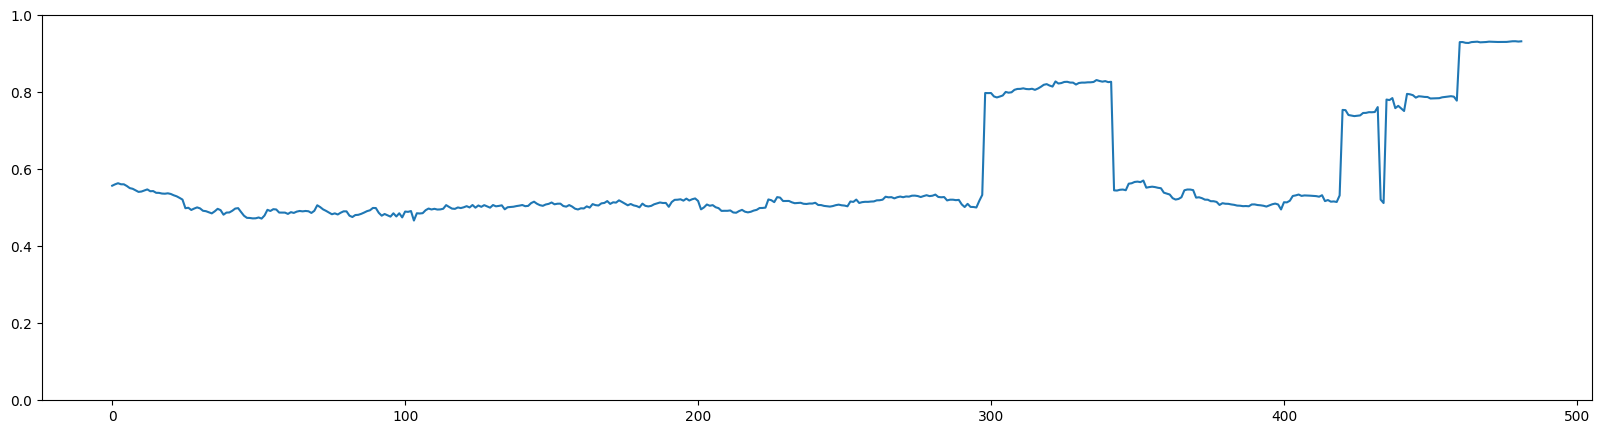

In [15]:
round_data = df.loc[(df['NUMERICAL_MATCH_ID'] == 100000) & (df['UNIVERSAL_round'] == 7)]

r_x = round_data.drop(columns=["UNIVERSAL_CT_wins", "NUMERICAL_MATCH_ID"])
r_pred = logreg.predict_proba(r_x)

fig = plt.figure(figsize=(20, 5))
plt.plot(r_pred[:,1])
plt.ylim(0, 1)

In [57]:
cdf = pd.DataFrame([df.columns, logreg.coef_[0]]).T
cdf.sort_values(by=1, ascending=False).head(40)

,0,1
1637,UNIVERSAL_CT_alive_num,0.000798
1512,T9_stat_weapon_damage,0.000569
1023,T6_stat_weapon_damage,0.000444
834,T5_current_equip_value,0.000375
1186,T7_stat_weapon_damage,0.000338
696,CT4_stat_damage,0.000333
172,CT1_armor_value,0.000277
859,T5_stat_damage,0.000274
1160,T7_current_equip_value,0.000262
535,CT3_stat_nade_damage,0.000258


### XGBoost

(0.0, 1.0)

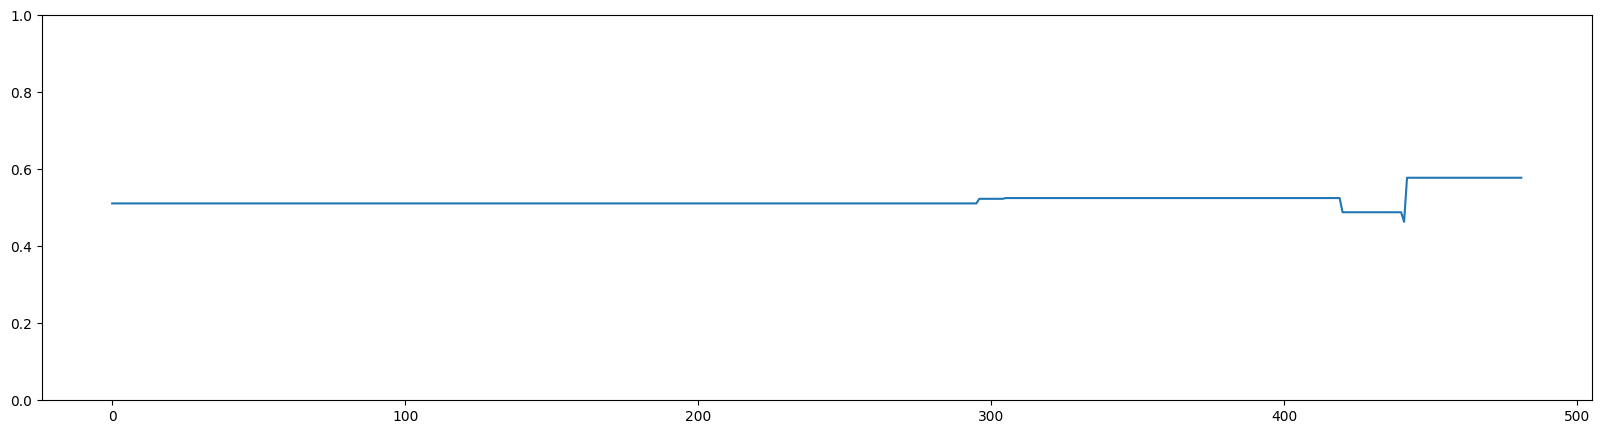

In [14]:
round_data = df.loc[(df['NUMERICAL_MATCH_ID'] == 100000) & (df['UNIVERSAL_round'] == 7)]

r_x = round_data.drop(columns=["UNIVERSAL_CT_wins", "NUMERICAL_MATCH_ID"])
r_pred = xgb.predict_proba(r_x)

fig = plt.figure(figsize=(20, 5))
plt.plot(r_pred[:,1])
plt.ylim(0, 1)

### Decision tree

(0.0, 1.0)

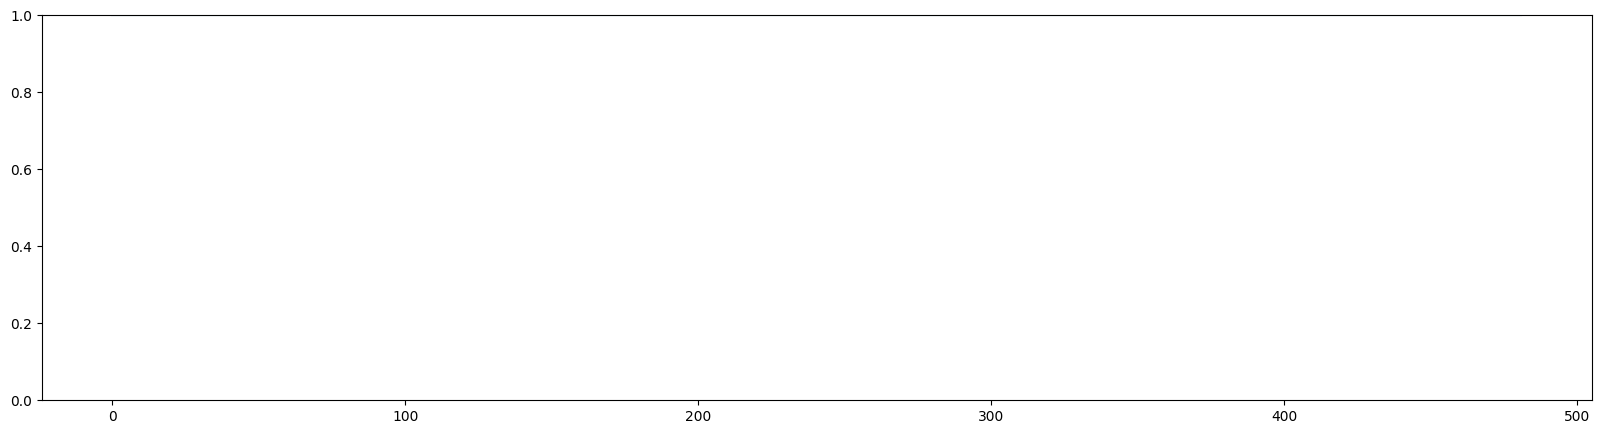

In [13]:
round_data = df.loc[(df['NUMERICAL_MATCH_ID'] == 100000) & (df['UNIVERSAL_round'] == 7)]

r_x = round_data.drop(columns=["UNIVERSAL_CT_wins", "NUMERICAL_MATCH_ID"])
r_pred = dectree.predict_proba(r_x)

fig = plt.figure(figsize=(20, 5))
plt.plot(r_pred[:,1])
plt.ylim(0, 1)